### Download and visualise Structural Geophysics Atlas 
Follows the [pynoddy tutorial](https://pynoddy.readthedocs.io/en/latest/notebooks/5-Geophysical-Potential-Fields.html) on read and visualise Geophysical Potential Fields.

In [1]:
%matplotlib inline

import sys, os
import matplotlib.pyplot as plt
# adjust some settings for matplotlib
from matplotlib import rcParams
# print rcParams
rcParams['font.size'] = 15
# determine path of repository to set paths corretly below
repo_path = os.path.realpath('../..')
import pynoddy
import pynoddy.history
import pynoddy.output

import colorcet as cc
import numpy as np

from IPython.core.display import HTML
# css_file = 'pynoddy.css'
# HTML(open(css_file, "r").read())

## Load history and compute block model

In [4]:
his = pynoddy.history.NoddyHistory(url = "http://tectonique.net/asg/ch3/ch3_5/his/fold_thrust.his")
his.determine_model_stratigraphy()
his.change_cube_size(50)
history_name = "fold_thrust_edit.his"
his.write_history(history_name)
# his = pynoddy.history.NoddyHistory(history_name)

# history_name = 'fold_thrust.his'
output_name = "fold_thrust_out"
pynoddy.compute_model(history_name, output_name, verbose=True)

## Visualise profiles of models

In [32]:
# h_out = pynoddy.output.NoddyOutput(output_name)
# # his.determine_model_stratigraphy()
# h_out.plot_section('x',
#                    layer_labels = his.model_stratigraphy,
#                    colorbar_orientation = 'horizontal',
#                    colorbar=False,
#                    title = '',
# #                   savefig=True, fig_filename = 'fold_thrust_NS_section.eps',
#                    cmap = 'YlOrRd')

In [33]:
# h_out.plot_section('y', layer_labels = his.model_stratigraphy,
#                    colorbar_orientation = 'horizontal', title = '', cmap = 'YlOrRd',
# #                   savefig=True, fig_filename = 'fold_thrust_EW_section.eps',
#                    ve=1.5)

# # h_out.export_to_vtk(vtk_filename = "fold_thrust")

## Caclulate and plot Geophysics

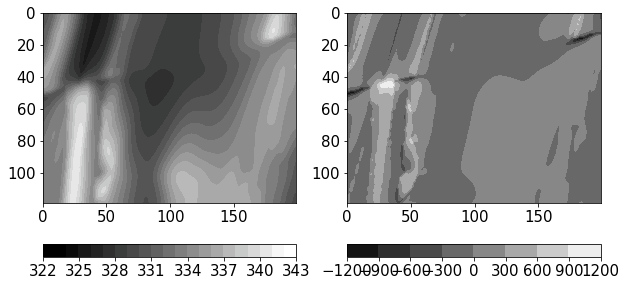

In [23]:
pynoddy.compute_model(history_name, output_name, sim_type = "GEOPHYSICS")
geophys = pynoddy.output.NoddyGeophysics(output_name)

fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(121)
# imshow(geophys.grv_data, cmap = 'jet')
# define contour levels
levels = np.arange(322,344,1)
cf = ax.contourf(geophys.grv_data, levels, cmap = cc.cm.gray, vmin = 324, vmax = 342)
ax.invert_yaxis()
cbar = plt.colorbar(cf, orientation = 'horizontal')
ax = fig.add_subplot(122)
cf = ax.contourf(geophys.mag_data, cmap = cc.cm.gray)
ax.invert_yaxis()

cbar = plt.colorbar(cf, orientation = 'horizontal')